In [2]:
!pip install catboost
!pip install xgboost
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from matplotlib import pyplot
from numpy import sqrt
from numpy import argmax
import lightgbm as lgb
from lightgbm import LGBMClassifier

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/rspec 10000.csv', sep=',')
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,RSpecNetAC,RSpecNetAU,RSpecNetCA,RSpecNetIA,RSpecNetSA,RSpecNetSC,RSpecNetSI,RSpecComAC,RSpecComAU,RSpecComCA,...,RSpecAuxCM,RSpecAuxCP,RSpecAuxIR,RSpecAuxMA,RSpecAuxMP,RSpecAuxPE,RSpecAuxPL,RSpecAuxPM,RSpecAuxPS,RSpecAuxRA
0,2,1,4,1,2,4,2,4,1,3,...,2,4,1,3,3,2,2,2,1,3
1,2,4,2,1,2,1,1,1,2,2,...,4,3,3,2,3,2,3,3,2,3
2,1,2,3,2,2,4,2,4,4,1,...,2,4,4,3,2,4,3,3,1,2
3,3,1,1,2,1,1,3,2,2,3,...,1,1,4,1,3,4,4,4,3,3
4,1,3,2,3,3,3,3,4,3,1,...,1,1,4,4,4,4,2,4,4,2


In [4]:
def Labelling(Rows):
    count = 0
    for digit in Rows:
        if digit == 1:
            count += 1

    if (count > 11):
      Label="1"
    elif (6 < count <= 11):
      Label="2"
    else:
      Label="3"
    return Label

df["label"]=df.apply(Labelling, axis=1)

df.head()

,RSpecNetAC,RSpecNetAU,RSpecNetCA,RSpecNetIA,RSpecNetSA,RSpecNetSC,RSpecNetSI,RSpecComAC,RSpecComAU,RSpecComCA,...,RSpecAuxCP,RSpecAuxIR,RSpecAuxMA,RSpecAuxMP,RSpecAuxPE,RSpecAuxPL,RSpecAuxPM,RSpecAuxPS,RSpecAuxRA,label
0,2,1,4,1,2,4,2,4,1,3,...,4,1,3,3,2,2,2,1,3,2
1,2,4,2,1,2,1,1,1,2,2,...,3,3,2,3,2,3,3,2,3,2
2,1,2,3,2,2,4,2,4,4,1,...,4,4,3,2,4,3,3,1,2,3
3,3,1,1,2,1,1,3,2,2,3,...,1,4,1,3,4,4,4,3,3,2
4,1,3,2,3,3,3,3,4,3,1,...,1,4,4,4,4,2,4,4,2,2


In [5]:
label=list(df.label)
one=0
two=0
three=0
a={'1':one,'2':two,'3':three}
for i in label:
  count=0
  if i =='1':
    count+=1
    one=one+count
  elif i =='2':
    count+=1
    two=count+two
  elif i=='3':
    count+=1
    three=three+count
a={'1':one,'2':two,'3':three}
print(a)


{'1': 821, '2': 6448, '3': 2731}


Streaming output truncated to the last 5000 lines.
207:	learn: 0.0816424	total: 1.34s	remaining: 593ms
208:	learn: 0.0812135	total: 1.35s	remaining: 587ms
209:	learn: 0.0806826	total: 1.35s	remaining: 580ms
210:	learn: 0.0802305	total: 1.36s	remaining: 574ms
211:	learn: 0.0798330	total: 1.36s	remaining: 567ms
212:	learn: 0.0793709	total: 1.37s	remaining: 560ms
213:	learn: 0.0789232	total: 1.38s	remaining: 554ms
214:	learn: 0.0785485	total: 1.38s	remaining: 547ms
215:	learn: 0.0780730	total: 1.39s	remaining: 541ms
216:	learn: 0.0776549	total: 1.4s	remaining: 534ms
217:	learn: 0.0772805	total: 1.4s	remaining: 528ms
218:	learn: 0.0769095	total: 1.41s	remaining: 523ms
219:	learn: 0.0765728	total: 1.42s	remaining: 516ms
220:	learn: 0.0762095	total: 1.42s	remaining: 509ms
221:	learn: 0.0757732	total: 1.43s	remaining: 503ms
222:	learn: 0.0753215	total: 1.44s	remaining: 497ms
223:	learn: 0.0748742	total: 1.45s	remaining: 490ms
224:	learn: 0.0744779	total: 1.45s	remaining: 484ms
225:	learn: 0.0

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002220 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 160
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 32
[LightGBM] [Info] Start training from score -2.478428
[LightGBM] [Info] Start training from score -0.448046
[LightGBM] [Info] Start training from score -1.282836
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000963 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 160
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 32
[LightGBM] [Info] Start training from score -2.478428
[LightGBM] [Info] Start training from score -0.448046
[LightGBM] [Info] Start trai

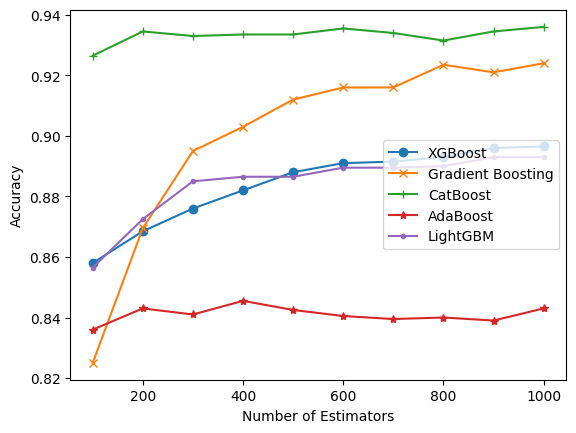

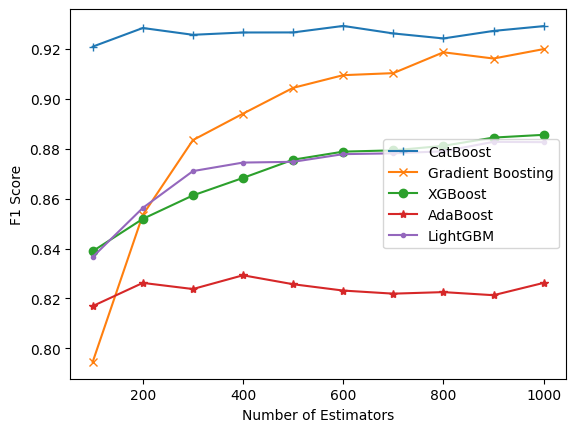

In [6]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

X = df.drop('label', axis=1)
y = df['label']

class_mapping = {label: idx for idx, label in enumerate(np.unique(y))}
y = y.map(class_mapping)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

n_estimators = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

accuracies = []
gb_accuracies=[]
cat_accuracies=[]
ada_accuracies=[]
lgb_accuracies=[]

catboost_scores = []
gradientboost_scores = []
ada_scores=[]
lgb_scores=[]
xg_scores=[]

for n in n_estimators:
    # XGBoost Classifier
    xgb_clf = XGBClassifier(n_estimators=n, random_state=42)
    xgb_clf.fit(X_train, y_train)
    xgb_predictions = xgb_clf.predict(X_test)
    accuracy = accuracy_score(y_test, xgb_predictions)
    accuracies.append(accuracy)
    xg_scores.append(f1_score(y_test, xgb_predictions, average='weighted'))

# Gradient Boosting Classifier
for n in n_estimators:
    gb_clf = GradientBoostingClassifier(n_estimators=n, random_state=42)
    gb_clf.fit(X_train, y_train)
    gb_predictions = gb_clf.predict(X_test)
    gb_accuracy = accuracy_score(y_test, gb_predictions)
    gb_accuracies.append(gb_accuracy)
    gradientboost_scores.append(f1_score(y_test, gb_predictions, average='weighted'))

# CatBoost Classifier
for n in n_estimators:
    cat_clf = CatBoostClassifier(n_estimators=n, random_state=42)
    cat_clf.fit(X_train, y_train)
    cat_predictions = cat_clf.predict(X_test)
    cat_accuracy = accuracy_score(y_test, cat_predictions)
    cat_accuracies.append(cat_accuracy)
    catboost_scores.append(f1_score(y_test, cat_predictions, average='weighted'))

# AdaBoost Classifier
for n in n_estimators:
    ada_clf = AdaBoostClassifier(n_estimators=n, random_state=42)
    ada_clf.fit(X_train, y_train)
    ada_predictions = ada_clf.predict(X_test)
    ada_accuracy = accuracy_score(y_test, ada_predictions)
    ada_accuracies.append(ada_accuracy)
    ada_scores.append(f1_score(y_test, ada_predictions, average='weighted'))

# LightGBM Classifier
for n in n_estimators:
    lgb_clf = LGBMClassifier(n_estimators=n, random_state=42)
    lgb_clf.fit(X_train, y_train)
    lgb_predictions = lgb_clf.predict(X_test)
    lgb_accuracy = accuracy_score(y_test, lgb_predictions)
    lgb_accuracies.append(lgb_accuracy)
    lgb_scores.append(f1_score(y_test, lgb_predictions, average='weighted'))

plt.plot(n_estimators, accuracies,label='XGBoost', marker='o')
plt.plot(n_estimators, gb_accuracies,label='Gradient Boosting', marker='x')
plt.plot(n_estimators, cat_accuracies,label='CatBoost', marker='+')
plt.plot(n_estimators, ada_accuracies,label='AdaBoost', marker='*')
plt.plot(n_estimators, lgb_accuracies,label='LightGBM', marker='.')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.legend(loc='center right')
plt.savefig("accuracy.png")
plt.show()

plt.plot(n_estimators, catboost_scores, label='CatBoost', marker='+')
plt.plot(n_estimators, gradientboost_scores, label='Gradient Boosting',marker='x')
plt.plot(n_estimators, xg_scores, label='XGBoost',marker='o')
plt.plot(n_estimators, ada_scores, label='AdaBoost',marker='*')
plt.plot(n_estimators, lgb_scores, label='LightGBM',marker='.')
plt.xlabel('Number of Estimators')
plt.ylabel('F1 Score')
plt.legend(loc='center right')
plt.savefig("F1 score.png")
plt.show()


Learning rate set to 0.5
0:	learn: 0.9082547	total: 5.77ms	remaining: 571ms
1:	learn: 0.8220224	total: 11.1ms	remaining: 542ms
2:	learn: 0.7604440	total: 17.4ms	remaining: 562ms
3:	learn: 0.7096250	total: 22.6ms	remaining: 541ms
4:	learn: 0.6622356	total: 27.7ms	remaining: 527ms
5:	learn: 0.6171193	total: 32.9ms	remaining: 515ms
6:	learn: 0.5845955	total: 38ms	remaining: 505ms
7:	learn: 0.5572381	total: 43.1ms	remaining: 496ms
8:	learn: 0.5378001	total: 48.3ms	remaining: 489ms
9:	learn: 0.5158300	total: 59.7ms	remaining: 537ms
10:	learn: 0.4957583	total: 72.8ms	remaining: 589ms
11:	learn: 0.4747698	total: 82.9ms	remaining: 608ms
12:	learn: 0.4496593	total: 91.8ms	remaining: 614ms
13:	learn: 0.4331531	total: 98.6ms	remaining: 605ms
14:	learn: 0.4167132	total: 106ms	remaining: 599ms
15:	learn: 0.4068131	total: 114ms	remaining: 598ms
16:	learn: 0.3931643	total: 125ms	remaining: 612ms
17:	learn: 0.3827963	total: 133ms	remaining: 604ms
18:	learn: 0.3690675	total: 140ms	remaining: 595ms
19:	

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000934 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 160
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 32
[LightGBM] [Info] Start training from score -2.478428
[LightGBM] [Info] Start training from score -0.448046
[LightGBM] [Info] Start training from score -1.282836
Learning rate set to 0.5
0:	learn: 0.9127496	total: 37.9ms	remaining: 3.76s
1:	learn: 0.7968065	total: 80.9ms	remaining: 3.96s
2:	learn: 0.7021249	total: 117ms	remaining: 3.79s
3:	learn: 0.6235560	total: 153ms	remaining: 3.68s
4:	learn: 0.5688159	total: 189ms	remaining: 3.6s
5:	learn: 0.5243323	total: 224ms	remaining: 3.51s
6:	learn: 0.4827111	total: 259ms	remaining: 3.44s
7:	learn: 0.4536632	total: 299ms	remaining: 3.44s
8:	learn: 0.4241001	total: 326ms	remaining: 3.29s
9:	learn: 0

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000990 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 160
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 32
[LightGBM] [Info] Start training from score -2.478428
[LightGBM] [Info] Start training from score -0.448046
[LightGBM] [Info] Start training from score -1.282836
Learning rate set to 0.5
0:	learn: 0.9712059	total: 169ms	remaining: 16.7s
1:	learn: 0.8674885	total: 342ms	remaining: 16.8s
2:	learn: 0.7685281	total: 501ms	remaining: 16.2s
3:	learn: 0.6948746	total: 679ms	remaining: 16.3s
4:	learn: 0.6334069	total: 851ms	remaining: 16.2s
5:	learn: 0.5818386	total: 1.01s	remaining: 15.9s
6:	learn: 0.5330150	total: 1.18s	remaining: 15.6s
7:	learn: 0.4909593	total: 1.34s	remaining: 15.4s
8:	learn: 0.4540963	total: 1.5s	remaining: 15.2s
9:	learn: 0.4

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000893 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 160
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 32
[LightGBM] [Info] Start training from score -2.478428
[LightGBM] [Info] Start training from score -0.448046
[LightGBM] [Info] Start training from score -1.282836
Learning rate set to 0.342776
0:	learn: 0.9546824	total: 5.54ms	remaining: 1.1s
1:	learn: 0.8697834	total: 11.2ms	remaining: 1.11s
2:	learn: 0.8098580	total: 18.3ms	remaining: 1.2s
3:	learn: 0.7618246	total: 24.5ms	remaining: 1.2s
4:	learn: 0.7238105	total: 29.9ms	remaining: 1.16s
5:	learn: 0.6918773	total: 34.7ms	remaining: 1.12s
6:	learn: 0.6626019	total: 39.9ms	remaining: 1.1s
7:	learn: 0.6353919	total: 46.3ms	remaining: 1.11s
8:	learn: 0.6148578	total: 51.5ms	remaining: 1.09s
9:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000917 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 160
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 32
[LightGBM] [Info] Start training from score -2.478428
[LightGBM] [Info] Start training from score -0.448046
[LightGBM] [Info] Start training from score -1.282836
Learning rate set to 0.342776
0:	learn: 0.9624111	total: 19.2ms	remaining: 3.82s
1:	learn: 0.8638510	total: 38.3ms	remaining: 3.79s
2:	learn: 0.7788147	total: 57.3ms	remaining: 3.76s
3:	learn: 0.7167413	total: 76.2ms	remaining: 3.73s
4:	learn: 0.6600568	total: 94.8ms	remaining: 3.69s
5:	learn: 0.6147499	total: 114ms	remaining: 3.68s
6:	learn: 0.5779783	total: 133ms	remaining: 3.67s
7:	learn: 0.5432952	total: 152ms	remaining: 3.65s
8:	learn: 0.5157079	total: 171ms	remaining: 3.63s
9:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001746 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 160
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 32
[LightGBM] [Info] Start training from score -2.478428
[LightGBM] [Info] Start training from score -0.448046
[LightGBM] [Info] Start training from score -1.282836
Learning rate set to 0.342776
0:	learn: 1.0089128	total: 173ms	remaining: 34.4s
1:	learn: 0.9321747	total: 332ms	remaining: 32.9s
2:	learn: 0.8541776	total: 492ms	remaining: 32.3s
3:	learn: 0.7941973	total: 657ms	remaining: 32.2s
4:	learn: 0.7418797	total: 818ms	remaining: 31.9s
5:	learn: 0.6968825	total: 983ms	remaining: 31.8s
6:	learn: 0.6539432	total: 1.16s	remaining: 31.9s
7:	learn: 0.6133379	total: 1.32s	remaining: 31.8s
8:	learn: 0.5776272	total: 1.48s	remaining: 31.5s
9:	lear

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000981 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 160
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 32
[LightGBM] [Info] Start training from score -2.478428
[LightGBM] [Info] Start training from score -0.448046
[LightGBM] [Info] Start training from score -1.282836


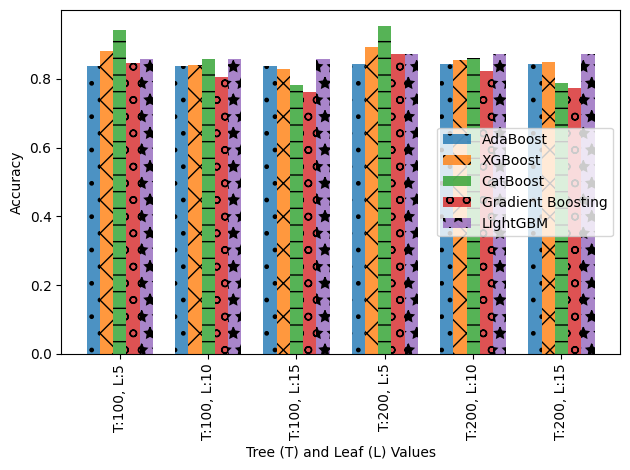

In [7]:
tree_values = [100, 200]
leaf_values = [5,10,15]

accuracies_xgb = []
accuracies_catboost = []
accuracies_gradientboost = []
accuracies_adaboost = []
accuracies_lightgbm = []

for trees in tree_values:
    for leaves in leaf_values:
        # XGBoost Classifier
        xgb_clf = XGBClassifier(n_estimators=trees, max_depth=leaves, random_state=42)
        xgb_clf.fit(X_train, y_train)
        xgb_predictions = xgb_clf.predict(X_test)
        xgb_accuracy = accuracy_score(y_test, xgb_predictions)
        accuracies_xgb.append(xgb_accuracy)

        # CatBoost Classifier
        catboost_clf = CatBoostClassifier(n_estimators=trees, max_depth=leaves, random_state=42)
        catboost_clf.fit(X_train, y_train)
        catboost_predictions = catboost_clf.predict(X_test)
        catboost_accuracy = accuracy_score(y_test, catboost_predictions)
        accuracies_catboost.append(catboost_accuracy)

        # Gradient Boosting Classifier
        gradientboost_clf = GradientBoostingClassifier(n_estimators=trees, max_depth=leaves, random_state=42)
        gradientboost_clf.fit(X_train, y_train)
        gradientboost_predictions = gradientboost_clf.predict(X_test)
        gradientboost_accuracy = accuracy_score(y_test, gradientboost_predictions)
        accuracies_gradientboost.append(gradientboost_accuracy)

        # Ada Boosting Classifier
        adaboost_clf = AdaBoostClassifier(n_estimators=trees, random_state=42)
        adaboost_clf.fit(X_train, y_train)
        adaboost_predictions = adaboost_clf.predict(X_test)
        adaboost_accuracy = accuracy_score(y_test, adaboost_predictions)
        accuracies_adaboost.append(adaboost_accuracy)

        # LightGBM Classifier
        lightgbm_clf = LGBMClassifier(n_estimators=trees, random_state=42)
        lightgbm_clf.fit(X_train, y_train)
        lightgbm_predictions = lightgbm_clf.predict(X_test)
        lightgbm_accuracy = accuracy_score(y_test, lightgbm_predictions)
        accuracies_lightgbm.append(lightgbm_accuracy)


labels = [f"T:{trees}, L:{leaves}" for trees in tree_values for leaves in leaf_values]
x_pos = np.arange(len(labels))
#print(labels)
bar_width = 0.15

offset = bar_width * 2

plt.bar(x_pos - offset, accuracies_adaboost, width=bar_width, align='center', alpha=0.8, label='AdaBoost', hatch='.')


plt.bar(x_pos - bar_width, accuracies_xgb, width=bar_width, align='center', alpha=0.8, label='XGBoost',hatch='x')


plt.bar(x_pos, accuracies_catboost, width=bar_width, align='center', alpha=0.8, label='CatBoost', hatch='-')


plt.bar(x_pos + bar_width, accuracies_gradientboost, width=bar_width, align='center', alpha=0.8, label='Gradient Boosting',hatch='o')


plt.bar(x_pos + 2 * bar_width, accuracies_lightgbm, width=bar_width, align='center', alpha=0.8, label='LightGBM',hatch='*')


plt.xlabel('Tree (T) and Leaf (L) Values')
plt.ylabel('Accuracy')
#plt.title('Comparison of Boosting Algorithms')


plt.xticks(x_pos, labels, rotation='vertical')


plt.legend(loc='center right')


plt.tight_layout()
plt.savefig("Boosting algorithms with different trees and leaves.png")
plt.show()

Learning rate set to 0.088986
0:	learn: 1.0507008	total: 7.99ms	remaining: 7.98s
1:	learn: 1.0094109	total: 15.2ms	remaining: 7.58s
2:	learn: 0.9738480	total: 22.8ms	remaining: 7.56s
3:	learn: 0.9447417	total: 29.8ms	remaining: 7.43s
4:	learn: 0.9167858	total: 37ms	remaining: 7.37s
5:	learn: 0.8919715	total: 44.1ms	remaining: 7.3s
6:	learn: 0.8696304	total: 50.9ms	remaining: 7.22s
7:	learn: 0.8495052	total: 57.9ms	remaining: 7.18s
8:	learn: 0.8306257	total: 65.1ms	remaining: 7.17s
9:	learn: 0.8148880	total: 72.6ms	remaining: 7.18s
10:	learn: 0.7983705	total: 79.6ms	remaining: 7.16s
11:	learn: 0.7842004	total: 86.7ms	remaining: 7.14s
12:	learn: 0.7702754	total: 93.7ms	remaining: 7.12s
13:	learn: 0.7569862	total: 101ms	remaining: 7.12s
14:	learn: 0.7450934	total: 108ms	remaining: 7.1s
15:	learn: 0.7335522	total: 115ms	remaining: 7.08s
16:	learn: 0.7226529	total: 122ms	remaining: 7.07s
17:	learn: 0.7126288	total: 129ms	remaining: 7.06s
18:	learn: 0.7036937	total: 136ms	remaining: 7.04s
19

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


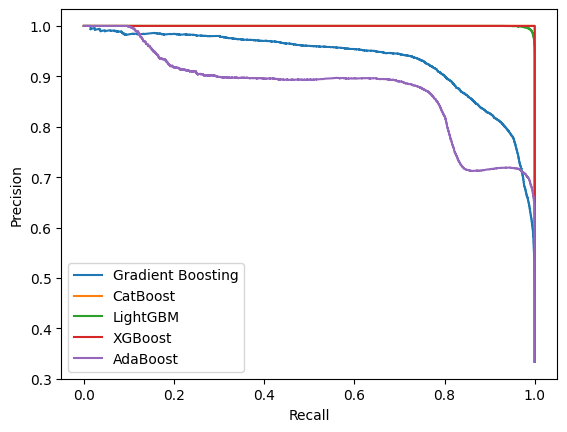

In [10]:
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize
from xgboost import XGBClassifier

X = df.drop('label', axis=1)
y = df['label']

class_mapping = {label: idx for idx, label in enumerate(np.unique(y))}
y = y.map(class_mapping)

num_classes = len(set(y))
y_true = label_binarize(y, classes=range(num_classes))

models = {
    'Gradient Boosting':GradientBoostingClassifier(),
    'CatBoost': CatBoostClassifier(),
    'LightGBM': LGBMClassifier(),
    'XGBoost': XGBClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

precision = dict()
recall = dict()
thresholds = dict()

for model_name, model in models.items():
    model.fit(X, y)

    predicted_probabilities = model.predict_proba(X)

    precision[model_name], recall[model_name], thresholds[model_name] = precision_recall_curve(
        y_true.ravel(), predicted_probabilities.ravel()
    )


plt.figure()

for model_name in models.keys():
    plt.step(recall[model_name], precision[model_name], where='post', label=model_name)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.savefig("PR curve.png")
plt.show()


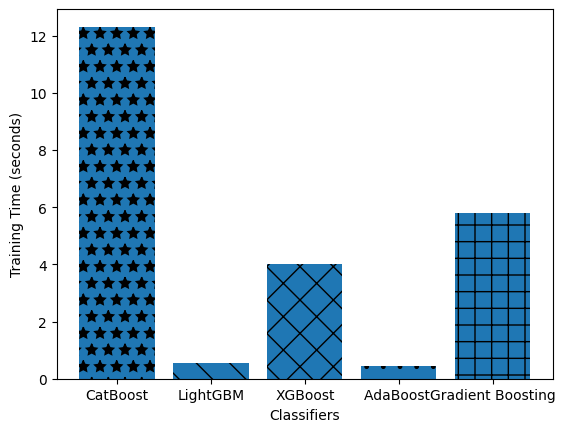

In [ ]:
import time

catboost = CatBoostClassifier(loss_function='MultiClass', logging_level='Silent')
lightgbm = LGBMClassifier(objective='multiclass', random_state=42)
xgboost = XGBClassifier(objective='multi:softmax', random_state=42)
adaboost = AdaBoostClassifier(random_state=42)
gradient_boosting = GradientBoostingClassifier(random_state=42)


start_time = time.time()
catboost.fit(X_train, y_train)
catboost_time = time.time() - start_time

start_time = time.time()
lightgbm.fit(X_train, y_train)
lightgbm_time = time.time() - start_time

start_time = time.time()
xgboost.fit(X_train, y_train)
xgboost_time = time.time() - start_time

start_time = time.time()
adaboost.fit(X_train, y_train)
adaboost_time = time.time() - start_time

start_time = time.time()
gradient_boosting.fit(X_train, y_train)
gradient_boosting_time = time.time() - start_time

classifiers = ['CatBoost', 'LightGBM', 'XGBoost', 'AdaBoost', 'Gradient Boosting']
training_times = [catboost_time, lightgbm_time, xgboost_time, adaboost_time, gradient_boosting_time]
hatches = ['*', '\\', 'x', '.', '+']

plt.bar(classifiers, training_times,hatch=hatches)
plt.xlabel('Classifiers')
plt.ylabel('Training Time (seconds)')
plt.savefig("Traning times.png")
plt.show()


Learning rate set to 0.023648
0:	learn: 0.6658108	total: 3.85ms	remaining: 3.85s
1:	learn: 0.6402303	total: 8.56ms	remaining: 4.27s
2:	learn: 0.6180705	total: 11.5ms	remaining: 3.81s
3:	learn: 0.5951441	total: 14.7ms	remaining: 3.66s
4:	learn: 0.5728174	total: 18ms	remaining: 3.59s
5:	learn: 0.5533583	total: 21.4ms	remaining: 3.54s
6:	learn: 0.5341597	total: 24.7ms	remaining: 3.51s
7:	learn: 0.5169097	total: 27.9ms	remaining: 3.46s
8:	learn: 0.4988646	total: 31ms	remaining: 3.41s
9:	learn: 0.4834644	total: 34.2ms	remaining: 3.38s
10:	learn: 0.4692953	total: 37.6ms	remaining: 3.38s
11:	learn: 0.4557112	total: 41.8ms	remaining: 3.44s
12:	learn: 0.4437475	total: 45.2ms	remaining: 3.43s
13:	learn: 0.4325364	total: 48.9ms	remaining: 3.45s
14:	learn: 0.4211573	total: 52.3ms	remaining: 3.43s
15:	learn: 0.4105725	total: 55.6ms	remaining: 3.42s
16:	learn: 0.4005829	total: 58.8ms	remaining: 3.4s
17:	learn: 0.3911220	total: 62.4ms	remaining: 3.4s
18:	learn: 0.3830446	total: 65.7ms	remaining: 3.39

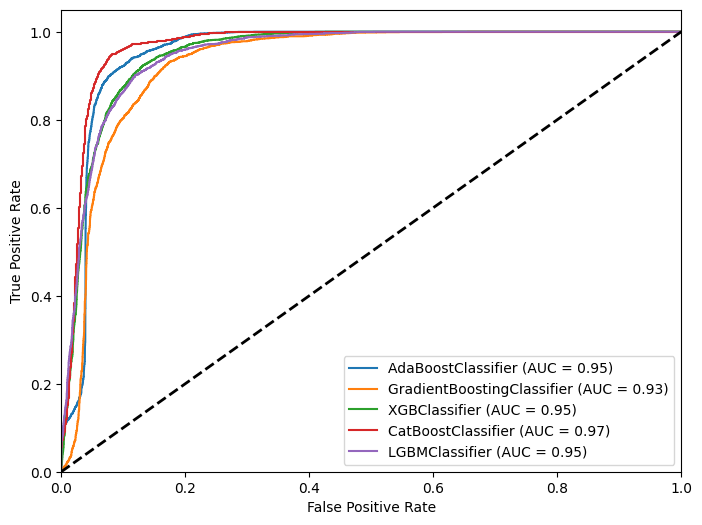

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.multiclass import OneVsRestClassifier


X = df.drop('label', axis=1)
y = df['label']


label_binarizer = LabelBinarizer()
y_one_hot = label_binarizer.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.3, random_state=42)


classifiers = [
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    xgb.XGBClassifier(),
    CatBoostClassifier(),
    lgb.LGBMClassifier()
]

plt.figure(figsize=(8, 6))

markers = ['o', '.', 'x', '+','1']

for classifier in classifiers:
    clf = OneVsRestClassifier(classifier)
    clf.fit(X_train, y_train)
    y_score = clf.predict_proba(X_test)

    fpr, tpr, _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc = auc(fpr, tpr)


    plt.plot(fpr, tpr, label=f'{classifier.__class__.__name__} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', linewidth=2)  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig("roc.png")
plt.show()